In [0]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob
from google.colab import drive
drive.mount('/content/drive')
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import skimage
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/TrainDataset.zip", 'r')
zip_ref.extractall("/content/Training")
zip_ref.close()

In [0]:
zip_ref_test = zipfile.ZipFile("/content/drive/My Drive/Project_C2_Testing-20191129T063942Z-001.zip", 'r')
zip_ref_test.extractall("/content/test")
zip_ref_test.close()

In [0]:
TRAIN_PATH = "/content/Training/TrainDataset"
TEST_PATH = "/content/test/Project_C2_Testing"

In [0]:
import numpy as np
from skimage import exposure

def load_data():
  path = TRAIN_PATH
  df = pd.read_csv('train_files.csv')
  X = []
  y = []
  # org = []
  for i, row in df.iterrows():
    filename = row["file_name"] 
    label = row["annotation"]
    file = open('/content/Training/TrainDataset/'+filename,'rb')
    im = cv2.imread('/content/Training/TrainDataset/'+filename)
    X.append(im)
    y.append(label)
  X = np.array(X)
  y = np.array(y)
  print(X.shape)
  
  return X,y
  
X,y = load_data()

(896, 480, 640, 3)


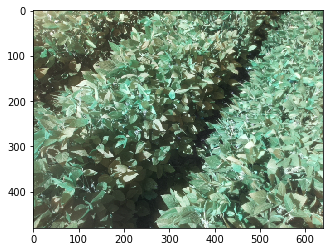

In [0]:
plt.imshow(X[1])

In [0]:
from sklearn.model_selection import train_test_split

trainX, valX, trainY, valY = train_test_split(X,y,test_size=0.3, stratify=y)

In [0]:
import sys, time

def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['acc'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['acc']
    val_acc_vals = history['val_acc']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

In [0]:
#best parameters
batch_size = 256
lr= 0.001
epochs = 150
drop = 0.6
opt = 'adam'
act = 'sigmoid'
hiddenunits = 512
# input_shape = (224, 224, 3)

def create_model(input_shape):
  model = Sequential()
  model.add(GlobalAveragePooling2D(input_shape=input_shape))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(5, activation='softmax'))
  return model

In [0]:
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras import Model,Sequential
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [0]:
# model_resnet = keras.applications.resnet.ResNet50(include_top=False, weights='imagenet',input_tensor=None, input_shape=None, pooling=None)
# model_resnet = keras.applications.resnet.ResNet101(include_top=False, weights='imagenet',input_tensor=None, input_shape=None, pooling=None)
# model_resnet = keras.applications.resnet.ResNet110(include_top=False, weights='imagenet',input_tensor=None, input_shape=None, pooling=None)
model_resnet = keras.applications.resnet.ResNet152(include_top=False, weights='imagenet',input_tensor=None, input_shape=None, pooling=None)
# model_resnet = keras.applications.resnet.ResNet164(include_top=False, weights='imagenet',input_tensor=None, input_shape=None, pooling=None)
# model_resnet = keras.applications.resnet_v2.ResNet152V2(include_top=False, weights='imagenet',input_tensor=None, input_shape=None, pooling=None)

output = model_resnet.output
resnet_optimized_model = Model(input=model_resnet.input, output=output)













234700800/234698864 [==============================] - 17s 0us/step


In [0]:
resnet_trainFeatures=resnet_optimized_model.predict(trainX)
resnet_valFeatures=resnet_optimized_model.predict(valX)
resnet_trainFeatures.shape

(627, 15, 20, 2048)

In [0]:
model_name = "resnet"
checkpointer = ModelCheckpoint(model_name + "_weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor="val_loss", verbose=1,save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=48, verbose=1, mode='auto')
tensorboard_cnn = TensorBoard(log_dir='./Graph_CNN', histogram_freq=0,write_graph=True, write_images=True)
calls = [early_stopping]

In [0]:
from keras.optimizers import Adam
res_model = create_model(input_shape = (15, 20, 2048))
res_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
res_history = res_model.fit(resnet_trainFeatures,trainY,validation_data=(resnet_valFeatures,valY), epochs=epochs, callbacks=calls, verbose=True, batch_size=batch_size, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 627 samples, validate on 269 samples
Epoch 1/150
627/627 [==============================] - 4s 6ms/step - loss: 2.6971 - acc: 0.3955 - val_loss: 2.0528 - val_acc: 0.4015
Epoch 2/150
627/627 [==============================] - 2s 3ms/step - loss: 1.5996 - acc: 0.5088 - val_loss: 1.1557 - val_acc: 0.5130
Epoch 3/150
627/627 [==============================] - 1s 2ms/step - loss: 1.1213 - acc: 0.5550 - val_loss: 1.1135 - val_acc: 0.6357
Epoch 4/150
627/627 [==============================] - 1s 2ms/step - loss: 1.0310 - acc: 0.6523 - val_loss: 0.8086 - val_acc: 0.6952
Epoch 5/150
627/627 [==============================] - 1s 2ms/step - loss: 0.7834 - acc: 0.6874 - val_loss: 0.7753 - val_acc: 0.7026
Epoch 6/150
627/627 [==============================] - 1s 2ms/step - loss: 0.7210 - acc: 0.7113 - val_loss: 0.7531 - val_acc: 0.7138
Epoch 7/150
627/627 [==============================] - 1s 2m

In [0]:
res_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 1,051,653
Trainable params: 1,051,653
Non-trainable params: 0
_________________________________________________________________


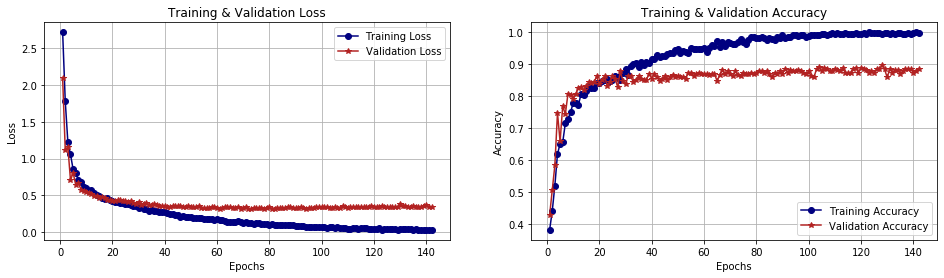

In [0]:
show_plots(res_history.history)

In [0]:
def load_test_data():
  in_test_dir = "/content/test/Project_C2_Testing"
  X = []
  files = os.listdir(in_test_dir)
  files = sorted(files)
  for filename in files:
    print(filename)
    im = cv2.imread(in_test_dir+'/'+filename)
    #cv2_imshow(im)
    X.append(im)
  X = np.array(X)
  print(X.shape)
  
  return X
  
testX = load_test_data()

000561.jpg
000747.jpg
000810.jpg
000934.jpg
001133.jpg
001140.jpg
001273.jpg
001506.jpg
001621.jpg
001659.jpg
002185.jpg
002282.jpg
002433.jpg
002532.jpg
002593.jpg
002762.jpg
002764.jpg
002864.jpg
003145.jpg
003386.jpg
003448.jpg
003550.jpg
003825.jpg
003880.jpg
004191.jpg
004539.jpg
004597.jpg
004898.jpg
004973.jpg
005127.jpg
005272.jpg
005592.jpg
005649.jpg
005829.jpg
005981.jpg
006029.jpg
006164.jpg
006253.jpg
006623.jpg
006828.jpg
007129.jpg
007662.jpg
007675.jpg
007749.jpg
007880.jpg
007921.jpg
007963.jpg
008059.jpg
008208.jpg
008487.jpg
008574.jpg
008628.jpg
008705.jpg
008827.jpg
008990.jpg
009135.jpg
009419.jpg
009496.jpg
009653.jpg
009903.jpg
010172.jpg
010516.jpg
010545.jpg
010595.jpg
010711.jpg
010806.jpg
010966.jpg
010999.jpg
011257.jpg
011305.jpg
011495.jpg
011553.jpg
011612.jpg
011674.jpg
012043.jpg
012068.jpg
012148.jpg
012263.jpg
012419.jpg
012543.jpg
012810.jpg
012847.jpg
012893.jpg
012923.jpg
012955.jpg
013010.jpg
013123.jpg
013436.jpg
013540.jpg
013591.jpg
013803.jpg

In [0]:
testFeatures=resnet_optimized_model.predict(testX)

In [0]:
testFeatures.shape

(129, 15, 20, 2048)

In [0]:
res_model.predict_classes(testFeatures)

array([1, 1, 3, 4, 1, 3, 3, 4, 0, 4, 4, 1, 0, 1, 0, 1, 0, 4, 0, 1, 3, 0,
       0, 2, 2, 4, 4, 4, 1, 0, 0, 0, 4, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       0, 4, 0, 0, 3, 1, 0, 1, 0, 2, 0, 0, 4, 1, 2, 2, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 1, 2, 1, 4, 0, 2, 1, 0, 0, 0, 0, 2, 1, 3, 0, 2, 0, 0, 0,
       0, 4, 0, 0, 2, 4, 4, 0, 0, 1, 0, 2, 3, 0, 1, 2, 2, 1, 0, 0, 4, 2,
       0, 1, 0, 0, 3, 4, 0, 2, 0, 1, 1, 0, 3, 0, 1, 0, 0, 2, 1])

In [0]:
output = np.zeros((len(testFeatures),5))
for i,x in enumerate(res_model.predict_classes(testFeatures)):
  output[i][x]=1
output.shape

(129, 5)

In [0]:
predictions = pd.DataFrame(output).astype('int32')
predictions

,0,1,2,3,4
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
124,0,1,0,0,0
125,1,0,0,0,0
126,1,0,0,0,0
127,0,0,1,0,0


In [0]:
predictions.to_csv('predictions_C4_v2.csv',index=False, header=False)



1. Resnet-50
---------------
Loss - 0.1812 | Acc - 94.74 | val_Loss - 0.5121 | val_acc - 82.53  (74/300) | 480 X 640 X 3
-----------------------------------------------
model_resnet = keras.applications.resnet.ResNet50
Loss - 0.8682 | Acc - 0.6603 | val_loss - 0.8726  | val_acc -0.6617 | 224 X 224 x 3
------------
loss: 0.1190 - acc: 0.9617 - val_loss: 0.5260 - val_acc: 0.8216
----------------------------------------------------------------------------------------------
2. ResNet101
loss: 0.1078 - acc: 0.9697 - val_loss: 0.4717 - val_acc: 0.8587 (111/30)
----------------------------------------------------------------------------------------------
3. ResNet152
loss: 0.1128 - acc: 0.9665 - val_loss: 0.4521 - val_acc: 0.7993
----------------------------------------------------------------------------------------------
4. ResNet50-V2
 loss: 8.2518 - acc: 0.4880 - val_loss: 8.2688 - val_acc: 0.4870
----------------------------------------------------------------------------------------------
5. ResNet101-V2
loss: 8.2518 - acc: 0.4880 - val_loss: 8.2688 - val_acc: 0.4870
-----------------------------------------------------------------

In [0]:
from google.colab import files
files.download('predictions_C4_v2.csv')

#https://keras.io/applications/

#### Hyper-parameter Tuning

In [0]:
various_models = pd.read_csv('predictions.csv')

In [0]:
various_models.head()

,ModelName,Loss,Accuracy,Val Loss,Val Accuracy,Training Accuracy,Validation Accuracy
0,Res152,0.0447,0.9952,0.3786,0.8550,99.52,85.50
1,VGG19,0.0770,0.9793,0.3855,0.8476,97.93,84.76
2,Dense169,0.2804,0.8979,0.4293,0.8401,89.79,84.01
3,Dense121,0.2556,0.8947,0.4535,0.8364,89.47,83.64
4,Res101,0.1078,0.9697,0.4717,0.8587,96.97,85.87


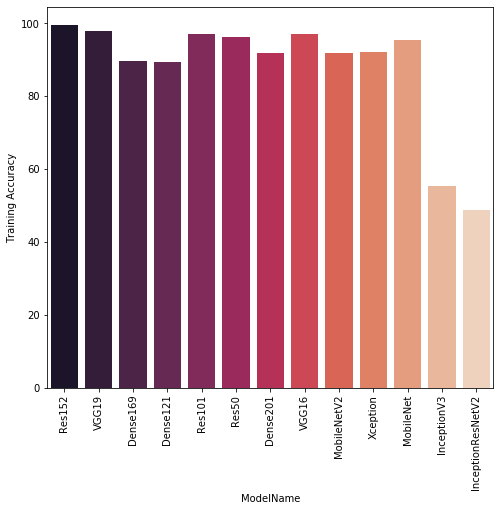

In [0]:

plt.figure(figsize=(8,7))
sns.barplot('ModelName', 'Training Accuracy', data=various_models, palette="rocket")
plt.xticks(rotation=90)
plt.savefig('train_acc.png',dpi=100,bbox_inches='tight')

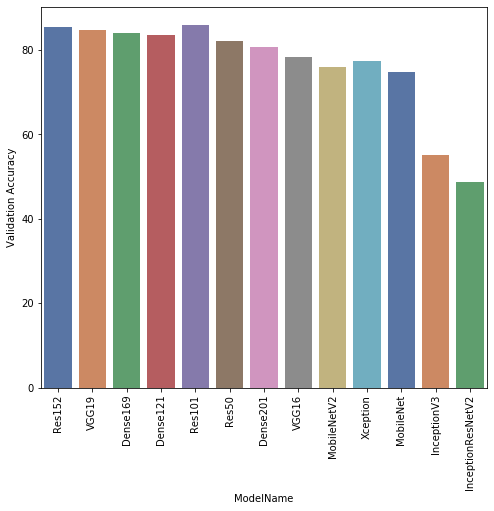

In [0]:
plt.figure(figsize=(8,7))
sns.barplot('ModelName', 'Validation Accuracy', data=various_models, palette="deep")
plt.xticks(rotation=90)
plt.savefig('val_acc.png',dpi=100,bbox_inches='tight')